In [1]:
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import requests
import time
import csv
import matplotlib.pyplot as plt
import numpy as np
#from prettytable import PrettyTable
import sqlite3


In [2]:
con = sqlite3.connect('my.db') #создали соединение с БД
cur = con.cursor() #курсор, по строкам будет ходить

def create_table_student():
    cur.execute('CREATE TABLE IF NOT EXISTS student (vk_id INT NOT NULL, name VARCHAR(45) NOT NULL, home_town VARCHAR(45) NOT NULL, PRIMARY KEY (vk_id), CONSTRAINT fk_student_student_sex  FOREIGN KEY (name) REFERENCES student_sex (student_name) ON DELETE NO ACTION ON UPDATE NO ACTION)')

def create_table_student_sex():
    cur.execute('CREATE TABLE IF NOT EXISTS student_sex (student_name VARCHAR(45) NOT NULL, student_sex VARCHAR(45) NULL, PRIMARY KEY (student_name))')    
    

def data_entry(value):    
    cur.execute('INSERT INTO student (vk_id, name, home_town) VALUES(?, ?, ?)',value)
    con.commit()

def data_entry_sex(value):    
    cur.execute('INSERT or IGNORE INTO student_sex (student_name, student_sex) VALUES(?, ?)',value)
    con.commit()

create_table_student()
create_table_student_sex()
    
        
def user_parser (j, id, sex):
    if sex==1:
        sex1='female'
    else:
        sex1='male'  
    url = "https://api.vk.com/method/users.get.xml?user_ids="+id[1:]+"&fields=home_town"
    r = requests.get(url)
    page = BeautifulSoup(r.text, 'html.parser')
    try: #(number, url, id, home_town, name, sex)
        answer = (str(j), id, page.uid.get_text(), page.home_town.get_text(), page.first_name.get_text(), sex1)
    except AttributeError:
        answer = (str(j), id, page.uid.get_text(), 'Error', page.first_name.get_text(), sex1)
    try:
        data_entry((answer[2],answer[4],answer[3]))
        data_entry_sex((answer[4],answer[5]))
    except UnicodeEncodeError:
        answer = (str(j), id, page.uid.get_text(), 'Error', page.first_name.get_text(), sex1)
        data_entry((answer[2],answer[4],answer[3]))
        data_entry_sex((answer[4],answer[5]))
    time.sleep(0.33)

In [3]:
ua = UserAgent()
print(ua.chrome)
header = {'User-Agent':str(ua.chrome)}
print(header)

Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36
{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36'}


In [4]:
j=0
bdate=17

while bdate<=25:
    sex=1
    while sex<=2:
        i=1
        while i<=1:
            if i==0:
                url = "https://vk.com/search?c%5Bage_from%5D="+str(bdate)+"&c%5Bage_to%5D="+str(bdate)+"&c%5Bcity%5D=2&c%5Bcountry%5D=1&c%5Bname%5D=1&c%5Bper_page%5D=40&c%5Bphoto%5D=1&c%5Bsection%5D=people&c%5Bsex%5D="+str(sex)+"&c%5Buniversity%5D=56&offset=0"
            else:
                url = "https://vk.com/search?c%5Bage_from%5D="+str(bdate)+"&c%5Bage_to%5D="+str(bdate)+"&c%5Bcity%5D=2&c%5Bcountry%5D=1&c%5Bname%5D=1&c%5Bper_page%5D=40&c%5Bphoto%5D=1&c%5Bsection%5D=people&c%5Bsex%5D="+str(sex)+"&c%5Buniversity%5D=56&offset="+str(20+i*20)
            r=requests.get(url, headers=header)
            print(r.ok)
            page = BeautifulSoup(r.text, 'html.parser')
            #print(page.prettify())
            tags=page.findAll("div", {"class":"labeled name"})
            #print (tags)
            print('Page', i+1)
            for tag in tags:
                some=tag.findAll("a", {"class": None})
                for link in some:
                    j=j+1
                    print (j,')' ,link.get('href'))
                    user_parser(j, link.get('href'), sex)
            i=i+1
            time.sleep(0.33)
        sex=sex+1
    bdate=bdate+1
cur.close()
con.close()

True
Page 2
1 ) /id25676529
2 ) /snezzzhana
3 ) /nastya_stausy
4 ) /losseella
5 ) /belyakovamaria
6 ) /feykina
7 ) /lakmanito21
8 ) /id351690564
9 ) /id255127441
10 ) /j_uli
11 ) /katerina.vasilyeva99
True
Page 2
12 ) /spbpromsnab
13 ) /kryakrya228
14 ) /danchik728
15 ) /aleks886
16 ) /nikitaoriginal
17 ) /ezolotaryov2013
18 ) /id212950644
19 ) /hellishdemoman
20 ) /alfaoscar_21
21 ) /vladmardus
22 ) /teptopek
23 ) /lesha1201
24 ) /victormikhaylov
25 ) /trappistoneb
26 ) /dinwinchester
True
Page 2
27 ) /id144504433
28 ) /elvira_29
29 ) /daria_kaverzina
30 ) /id134233495
31 ) /ridso
32 ) /margaretmargaret1
33 ) /id90437308
34 ) /kivikik
35 ) /all___al
36 ) /id79517509
37 ) /katyamnbv
38 ) /id70503750
39 ) /darya904
40 ) /id58194687
41 ) /elizabethmiu
True
Page 2
42 ) /alexandr_luchko
43 ) /peterkornush
44 ) /phi1618
45 ) /gnatunstyles
46 ) /id257193790
47 ) /dreyger87
48 ) /ilya0leitto
49 ) /id197935847
50 ) /therealsova
51 ) /dkirpikov
52 ) /id137824675
53 ) /mtblovelife
54 ) /ageres_g

In [37]:
path = "Home_Town.csv"
users = []
cities = []
with open(path, "r", newline="") as file:
    reader = csv.reader(file)
    i=0
    for row in reader:
        if row[3] == "Error" or row[3] == '':
            i=i
        elif i==0:
            users.append(row)
            #print(row)
            i = i + 1
        else:
            row[0]=i
            users.append(row)
            #print(row)
            i=i+1
Num_people=len(users)
for j in range(len(users)):
    if          users[j][3] == 'Санкт - Петербург' or \
                users[j][3] == 'Санкт Петербург' or\
                users[j][3] == 'СПб' or\
                users[j][3] == 'Питер' or\
                users[j][3] == 'Saint-Petersburg' or \
                users[j][3] == 'Петербург' or \
                users[j][3] == 'Санкт-петербург' or \
                users[j][3] == 'Санкт- Петербург' or \
                users[j][3] == 'Санкт-Петербург ' or\
                users[j][3] == 'санкт-петербург':
        cities.append('Санкт-Петербург')
    else:
        cities.append(users[j][3])
c=list(set(cities))

for i in range(len(c)):  #считаем города, которые встречаются один раз, мусором и статистически не важными. Удаляем мусор
    if cities.count(c[i])==1:
        cities.remove(c[i])
c=list(set(cities))

c1=[]
calc=[]
for i in range(len(c)):
    c1.append(cities.count(c[i]))
for i in range(len(c)):
    calc.append([c1[i],c[i]])
calc.sort(reverse=True)
print(calc)

[[1251, 'Санкт-Петербург'], [21, 'Норильск'], [21, 'Мурманск'], [19, 'Уфа'], [18, 'Екатеринбург'], [17, 'Челябинск'], [16, 'Тольятти'], [16, 'Сургут'], [16, 'Северодвинск'], [15, 'Череповец'], [15, 'Архангельск'], [14, 'Петрозаводск'], [13, 'Краснодар'], [13, 'Владивосток'], [11, 'Хабаровск'], [11, 'Набережные Челны'], [11, 'Москва'], [11, 'Колпино'], [11, 'Брянск'], [11, 'Барнаул'], [10, 'Якутск'], [10, 'Уральск'], [10, 'Сыктывкар'], [10, 'Самара'], [10, 'Омск'], [10, 'Магнитогорск'], [10, 'Костанай'], [10, 'Кемерово'], [9, 'Ставрополь'], [9, 'Сочи'], [9, 'Смоленск'], [9, 'Оренбург'], [9, 'Мирный'], [9, 'Калининград'], [9, 'Гатчина'], [9, 'Выборг'], [9, 'Великий Новгород'], [9, 'Saint-P'], [9, 'Cанкт-Петербург'], [8, 'Торжок'], [8, 'Тихвин'], [8, 'СПБ'], [8, 'Петропавловск-Камчатский'], [8, 'Нижневартовск'], [8, 'Донецк'], [8, 'Великие Луки'], [8, 'Алматы'], [7, 'Ярославль'], [7, 'Ухта'], [7, 'Псков'], [7, 'Пермь'], [7, 'Орск'], [7, 'Новосибирск'], [7, 'Новокузнецк'], [7, 'Красноярск'

In [67]:
city=['Город']
city_num=['Число студентов, чел']
city_percent=['В процентном соотношении, %']
for i in range(len(calc)):
    city_num.append(calc[i][0])
    city_percent.append(calc[i][0]*100/Num_people)
    city.append(calc[i][1])
print('Число анализируемых пользователей =', Num_people)
th=['N' ,city[0], city_num[0], city_percent[0]]
table = PrettyTable(th)
for i in range(25):
    i=i+1
    table.add_row([i ,city[i], city_num[i], round(city_percent[i],2)])
print(table)

Число анализируемых пользователей = 3076
+----+------------------+----------------------+-----------------------------+
| N  |      Город       | Число студентов, чел | В процентном соотношении, % |
+----+------------------+----------------------+-----------------------------+
| 1  | Санкт-Петербург  |         1251         |            40.67            |
| 2  |     Норильск     |          21          |             0.68            |
| 3  |     Мурманск     |          21          |             0.68            |
| 4  |       Уфа        |          19          |             0.62            |
| 5  |   Екатеринбург   |          18          |             0.59            |
| 6  |    Челябинск     |          17          |             0.55            |
| 7  |     Тольятти     |          16          |             0.52            |
| 8  |      Сургут      |          16          |             0.52            |
| 9  |   Северодвинск   |          16          |             0.52            |
| 10 |    Ч

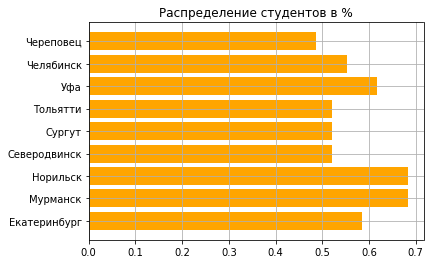

In [70]:
fig = plt.figure()
axes = fig.add_subplot (1, 1, 1)
plt.barh(city[2:11], city_percent[2:11], align='center', color='orange')
axes.set_xscale ('linear')
plt.title('Распределение студентов в %')
plt.grid(True)   # линии вспомогательной сетки
plt.show()